In [ ]:
#########----Laplace-Equation-in-1D-----#########

Epoch 0, Loss: [[0.8708394]]
Epoch 500, Loss: [[0.]]
Epoch 1000, Loss: [[0.]]
Epoch 1500, Loss: [[0.]]
Epoch 2000, Loss: [[0.]]
Epoch 2500, Loss: [[0.]]
Epoch 3000, Loss: [[0.]]
Epoch 3500, Loss: [[0.]]
Epoch 4000, Loss: [[0.]]
Epoch 4500, Loss: [[0.]]


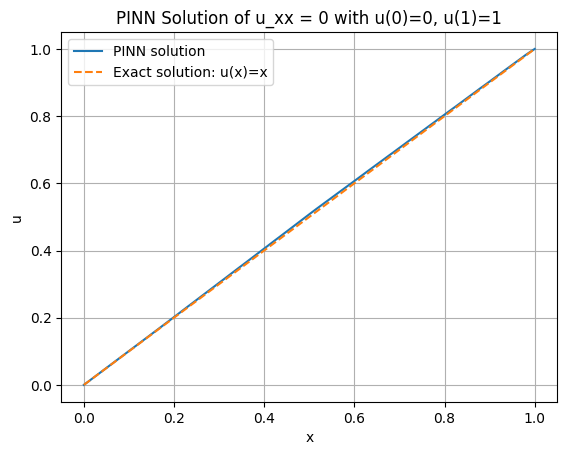

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 1, 100).reshape(-1, 1)
X_col = tf.convert_to_tensor(X, dtype=tf.float32)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='ReLU', input_shape=(1,)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam()
@tf.function
def train_step():
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(X_col)
        u = model(X_col)
        u_x = tape.gradient(u, X_col)
        u_xx = tape.gradient(u_x, X_col)
        f = u_xx
        # Physics loss: mean squared error of PDE residual
        loss_phys = tf.reduce_mean(tf.square(f))

        u_0 = model(tf.convert_to_tensor([[0.0]], dtype=tf.float32))
        u_1 = model(tf.convert_to_tensor([[1.0]], dtype=tf.float32))
        loss_bc = tf.square(u_0) + tf.square(u_1 - 1.0)

        loss = loss_phys + loss_bc

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

for i in range(5000):
    loss = train_step()
    if i%500 == 0:
        print(f"Epoch {i}, Loss: {loss}")

X_test = np.linspace(0, 1, 100).reshape(-1, 1).astype(np.float32)
u_pred = model(tf.convert_to_tensor(X_test)).numpy()

plt.plot(X_test, u_pred, label='PINN solution')
plt.plot(X_test, X_test, '--', label='Exact solution: u(x)=x')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('PINN Solution of u_xx = 0 with u(0)=0, u(1)=1')
plt.grid(True)
plt.show()


In [ ]:
############----Damped-Harmonic-Oscillator----############

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 200, 200).reshape(-1, 1)
t_col = tf.convert_to_tensor(t, dtype=tf.float32)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(2)
])
optimizer = tf.keras.optimizers.Adam()
@tf.function
def train_step():
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t_col)
        u = model(t_col)
        m = 1
        c = 0.1
        k = 0.1
        x = u[:, 0:1]  
        v = u[:, 1:2]
        dx_dt = tape.gradient(x, t_col) 
        dv_dt = tape.gradient(v, t_col)
        l1 =dx_dt-v
        l2 = dv_dt + (c/m)*v + (k/m)*u
        loss_phys = tf.reduce_mean(tf.square(l1)) + tf.reduce_mean(tf.square(l2))
        x_0 = model(tf.convert_to_tensor([[0.0]], dtype=tf.float32))[:, 0:1]
        v_1 = model(tf.convert_to_tensor([[0.0]], dtype=tf.float32))[:, 1:2]
        loss_bc = tf.square(x_0-0.05) + tf.square(v_1)
        loss = loss_bc + loss_phys
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

for i in range(5000):
    loss = train_step()
    if i%500 == 0:
        print(f"Epoch {i}, Loss: {loss}")



Epoch 0, Loss: [[0.02555655]]
Epoch 500, Loss: [[3.732536e-06]]
Epoch 1000, Loss: [[5.730031e-07]]
Epoch 1500, Loss: [[4.252953e-07]]
Epoch 2000, Loss: [[2.8197212e-07]]
Epoch 2500, Loss: [[6.102245e-07]]
Epoch 3000, Loss: [[3.7375895e-07]]
Epoch 3500, Loss: [[2.6500973e-07]]
Epoch 4000, Loss: [[2.0621101e-07]]
Epoch 4500, Loss: [[1.8517736e-07]]


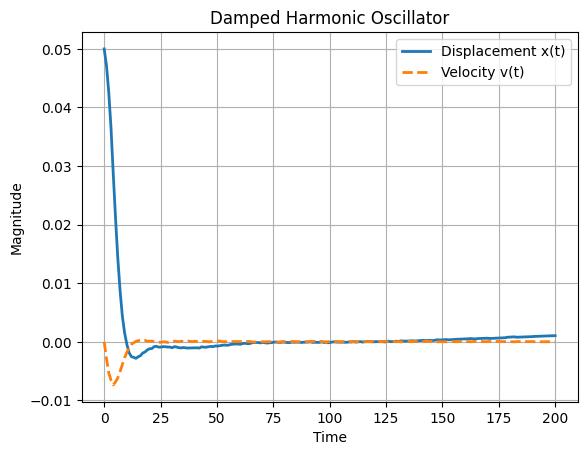

In [4]:
X_test = np.linspace(0, 200, 200).reshape(-1, 1).astype(np.float32)
u_pred = model(tf.convert_to_tensor(X_test)).numpy()
plt.plot(X_test, u_pred[:, 0], label='Displacement x(t)', linewidth=2)
plt.plot(X_test, u_pred[:, 1], '--', label='Velocity v(t)', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.title("Damped Harmonic Oscillator")
plt.show()